## Ad Click Prediction: What, why, and how?

- The online advertisement industry has become a multi-billion industry, and predicting ad **CTR** (click-through rate) is now central. Nowadays, different types of advertisers and search engines rely on modelling to predict ad CTR accurately.


- We will be predicting the ad click-through rate using the machine learning approach. Before that, let us first understand few essential concepts and a general practice followed by search engines to decide which ads to display.


- **CTR**: It is the metric used to measure the percentage of impressions that resulted in a click.

![1_5sGHKxGfu78MLdA8a5DXGw.jpeg](attachment:1_5sGHKxGfu78MLdA8a5DXGw.jpeg)

- ```Search ads```: Advertisements that get displayed when a user searches for a particular keyword.


- Paid search advertising is a popular form of **Pay per click (PPC)** advertising in which brands or advertisers pay (bid amount) to have their ads displayed when users search for specific keywords.


- Relevance of Predicting CTR through a real-life example:


Typically, the primary source of income for search engines like Google is through advertisement. Many companies pay these search engines to display their ads when a user searches for a particular keyword. Our focus is on search ads and CTR, i.e. the amount is paid only when a user clicks on the link and redirects to the brand’s website.

- Different advertisers approach these search engines with their ads and the bidding amount to display their ads. The main objective of these search engines is to maximize their revenue. So the question is, how does a search engine decide which ads to display when a user searches for a particular keyword?


- Till now, we have seen what ad click prediction is and why is it important. Let us now explore how to calculate ad click prediction by performing machine learning modelling on a dataset. We will build a Logistic Regression model that would help us predict whether a user will click on an ad or not based on the features of that user. And hence calculate the probability of a user clicking on an ad.


- Using these probabilities, search engines could decide which ads to display by multiplying the possibilities with the bid amount and sorting it out.


## Problem Statement

- In this project, we will work with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a particular user will click on an advertisement.

- The data consists of **10** variables:

**'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'.**

- The primary variable we are interested in is ```' Clicked on Ad'```.

This variable can have two possible outcomes: 0 and 1, where 0 refers to a user who didn't click the advertisement, while one refers to the scenario where a user clicks the ad.

- We will see if we can use the other **9** variables to accurately predict the value **'Clicked on Ad'** variable.

- We will also perform some exploratory data analysis to see how **'Daily Time Spent on Site'** in combination with **'Ad Topic Line'** affects the user's decision to click on the ad.

## Introduction

This project's goals are to deeply explore data to do with advertising, perform quantitive analysis, and achieve predictions from the data using machine learning techniques.


- This data set contains the following features:


- ```Daily Time Spent on Site```: consumer time on-site in minutes

- ```Age```: customer age in years

- ```Area Income```: Avg. Income of geographical area of consumer

- ```Daily Internet Usage```: Avg. minutes a day consumer is on the internet

- ```Ad Topic Line```: Headline of the advertisement

- ```City```: City of consumer

- ```Male```: Whether or not the consumer was male

- ```Country```: Country of consumer

- ```Timestamp```: Time at which consumer clicked on Ad or closed window

- ```Clicked on Ad```: 0 or 1 indicated clicking on Ad


## Load Libraries

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#importing dataset and libraries
import pandas as pd
import plotly.express as px

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

**Reading the file**

In [7]:
df=pd.read_csv("/content/drive/MyDrive/ML Projects/-Machine-Learning-Project-Click-Through-Rate--main/data/advertising.csv")

The data is based on a specific Company.

## Examine the data

In [8]:
df.head(10)  # Checking the 1st 10 rows of the data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


## Data type and length of the variables

In [9]:
df.info() # gives the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
#shape of Dataset
df.shape

(1000, 10)

#### Next, let us test if the data contains any duplicates or not

In [11]:
df.duplicated().sum() # displays duplicate records

0

The data is looking all good on this front, there are **0** duplicates.

## Check for Missing Values

**Let us see if there are any null values within the data set or not.**

In [12]:
for col in df.columns :
    msg = 'columnn : {:>10}\t count of NaN value : {:.0f}'.format(col, 100 * (df[col].isnull().sum() ))
    print(msg)

columnn : Daily Time Spent on Site	 count of NaN value : 0
columnn :        Age	 count of NaN value : 0
columnn : Area Income	 count of NaN value : 0
columnn : Daily Internet Usage	 count of NaN value : 0
columnn : Ad Topic Line	 count of NaN value : 0
columnn :       City	 count of NaN value : 0
columnn :       Male	 count of NaN value : 0
columnn :    Country	 count of NaN value : 0
columnn :  Timestamp	 count of NaN value : 0
columnn : Clicked on Ad	 count of NaN value : 0


Observing the output of this code shows us that there is a **0%** presence of null values within each column of the data.

## Numerical and Categorical Variables Identification

In [13]:
df.columns # displays column names

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [14]:
df.select_dtypes(include = ['object']).columns # Displays categorical variables which are detected by python

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [15]:
# Assigning columns as numerical variables
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [16]:
# Assigning columns as categorical variables
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

In [17]:
# statistical Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


- Daily Time Spent on Site: We see users spend between 32 min to 91 min on the site with a mean value of 65min, which is quite a large amount of time. This indicates that it is a popular site. We would like to see if there is any corellation with time spend on the site and 'clicked on Ad'.

- Age: The user age ranges from 19years to 61 years with a mean of 36 years, which tells us that the target users are adults.

- Area Income: The minimum users income is around 13k and the maximum user income is 79k, which tells us that the users belongs to different social classes. We would like to further investigate how the income is corelates with the click on the ad.

- Daily Internet Usage: The daily internet use ranges from 104min to 269min. Out of total daily internet use, users spend quite a large amount of time on the site, which ranges from 32 to 91 min. We will check if they both are relates to each other in some way.

- Male: 48% of the users are male. We will check if gender affects the rate of click on the ad.

- See that 50% of the ads were clicked and 50% of the ad weren't clicked by the user. Which tells us that our ad dataset is balanced, which will have a positive affect on training accuracy.


## Summarizing Numerical Variables

In [18]:
# Decribe method is used to give statistical information on the numerical columns
df[numeric_cols].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


- As the mean and median```(50% percentile)``` are very similar to each other, which indicates that our data is not **skewed** and we do not require any data transformations.


- We shall confirm this by visualizing it as well.

## Summarizing Categorical Variables

In [19]:
obj_column = df.dtypes[df.dtypes == 'object'].index
for i in range(0, len(obj_column)) :
    print(obj_column[i])
    print(len(df[obj_column[i]].unique()))
    print()

Ad Topic Line
1000

City
969

Country
237

Timestamp
1000



In [20]:
# Decribe method is used to give statistical information on the categorical columns
df[Categorical_cols].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


- As we have many different **cities** (Unique) and not many people belonging to the same city(freq).
- So, it probably means that this feature has no or very little predictive power.
- However, we have less diversity with a country feature, so we have to investigate it further.

## Categorizing Quantitative and Qualitative Variables

- Here, we shall separate the quantitive and qualitative variables to summerise them.

- This should give us a bigger picture of what is going on.

### Qualitative

In [21]:
qual_cols = set(df.select_dtypes(include = ['object']).columns)
print(f'Qualitative Variables: {qual_cols}')

Qualitative Variables: {'City', 'Timestamp', 'Country', 'Ad Topic Line'}


- What is interesting to note here is that Pandas classifies the ```Timestamp``` variable as an object.

- Hence, it appears in this section here. A timestamp is not qualitative data.

In [22]:
qual_cols = qual_cols - {'Timestamp'}
print(f'Qualitative Variables: {qual_cols}')

Qualitative Variables: {'City', 'Country', 'Ad Topic Line'}


In [23]:
df[qual_cols].describe()

,City,Country,Ad Topic Line
count,1000,1000,1000
unique,969,237,1000
top,Lisamouth,France,Cloned 5thgeneration orchestration
freq,3,9,1


- Surprisingly, there are **237** countries present in the data.
- Even more surprising is that France appears the most at **9** times.
- This must mean that the countries in the dataset vary widely and that one country is not overly present in the data.
- All the ad topic lines and cities essentially are different for every instance.

### Quantitative

In [24]:
quant_cols = set(df.columns) - set(qual_cols)
print(f'Quantitative Variables: {quant_cols}')

Quantitative Variables: {'Daily Internet Usage', 'Clicked on Ad', 'Timestamp', 'Male', 'Daily Time Spent on Site', 'Age', 'Area Income'}


In [25]:
df[quant_cols].describe()

,Daily Internet Usage,Clicked on Ad,Male,Daily Time Spent on Site,Age,Area Income
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,180.000100,0.50000,0.481000,65.000200,36.009000,55000.000080
std,43.902339,0.50025,0.499889,15.853615,8.785562,13414.634022
min,104.780000,0.00000,0.000000,32.600000,19.000000,13996.500000
25%,138.830000,0.00000,0.000000,51.360000,29.000000,47031.802500
50%,183.130000,0.50000,0.000000,68.215000,35.000000,57012.300000
75%,218.792500,1.00000,1.000000,78.547500,42.000000,65470.635000
max,269.960000,1.00000,1.000000,91.430000,61.000000,79484.800000


## Extracting Datetime Variables

- Now, we shall introduce new columns **Hour, Day of Week, Date, Month** from timestamp

- Utilizing the ```timestamp``` feature to understand the pattern better when a user clicks on an ad.

In [26]:
# Extract datetime variables using timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Converting timestamp column into datatime object in order to extract new features
df['Month'] = df['Timestamp'].dt.month
# Creates a new column called Month
df['Day'] = df['Timestamp'].dt.day
# Creates a new column called Day
df['Hour'] = df['Timestamp'].dt.hour
# Creates a new column called Hour
df["Weekday"] = df['Timestamp'].dt.dayofweek
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
df['Date'] = df['Timestamp'].apply(lambda t : t.date())
df = df.drop(['Timestamp'], axis=1) # deleting timestamp

## Lets Visualise the Data
### Distribution of daily time with ads

In [27]:
px.histogram(df,x='Daily Time Spent on Site',
             color='Clicked on Ad',
             template="none",
             color_discrete_sequence= px.colors.sequential.Darkmint)

# 0 and 1, where 0 refers to a user who didn't click the advertisement, while one refers to the scenario where a user clicks the ad.

### Distribution of daily internet with ads

In [28]:
px.histogram(df,x='Daily Internet Usage',
             color='Clicked on Ad',
             template="none",
             color_discrete_sequence= px.colors.sequential.Teal)

### Top city with daily time

In [29]:
city_dailytime=pd.DataFrame(df.groupby('City')['Daily Time Spent on Site'].mean().sort_values(ascending=False)[:20])
city_dailytime=city_dailytime.rename_axis(['City']).reset_index()
city_dailytime
px.bar(city_dailytime, x='City', y='Daily Time Spent on Site',template="none",color_discrete_sequence= px.colors.sequential.Redor)

### Top city with area income

In [30]:
city_areaincome=pd.DataFrame(df.groupby('City')['Area Income'].mean().sort_values(ascending=False)[:20])
city_areaincome=city_areaincome.rename_axis(['City']).reset_index()
city_areaincome
px.bar(city_areaincome, x='City', y='Area Income',template="none",color_discrete_sequence= px.colors.sequential.Burg)

### Top city with avg internet

In [31]:
city_avginternet=pd.DataFrame(df.groupby('City')['Daily Internet Usage'].mean().sort_values(ascending=False)[:20])
city_avginternet=city_avginternet.rename_axis(['City']).reset_index()
city_avginternet
px.bar(city_avginternet, x='City', y='Daily Internet Usage',template="none",color_discrete_sequence= px.colors.sequential.Tealgrn)

### Investigating the Country Variable

- It seems that without feature engineering, the **city** and **country** have very little prediction power.
- This is because they seem to be wide **nonhomogeneous**. Let us confirm this, however.

In [32]:
df.groupby('Country')['Clicked on Ad'].count().sort_values(ascending=False)

Country
France                   9
Czech Republic           9
Afghanistan              8
Australia                8
Turkey                   8
                        ..
Montserrat               1
Mozambique               1
Romania                  1
Saint Kitts and Nevis    1
Aruba                    1
Name: Clicked on Ad, Length: 237, dtype: int64

In [33]:
# Maximum number of internet users belong to which country in the given dataset male and feamle
pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values(1,0, ascending = False).head(10)

Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


#### These outputs suggest that no one ```country``` has an overall share in the data.

In [34]:
# Maximum number of internet users belong to which country in the given dataset?

pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


### Top city with avg internet

In [35]:
city_avginternet=pd.DataFrame(df.groupby('Country')['Daily Internet Usage'].mean().sort_values(ascending=False)[:20])
city_avginternet=city_avginternet.rename_axis(['Country']).reset_index()
city_avginternet
px.bar(city_avginternet, x='Country', y='Daily Internet Usage',template="none",color_discrete_sequence= px.colors.sequential.Sunsetdark)

### Top country with daily time

In [36]:
city_dailytime=pd.DataFrame(df.groupby('Country')['Daily Time Spent on Site'].mean().sort_values(ascending=False)[:20])
city_dailytime=city_dailytime.rename_axis(['Country']).reset_index()
city_dailytime
px.bar(city_dailytime, x='Country', y='Daily Time Spent on Site',template="none",color_discrete_sequence= px.colors.sequential.Magenta)

### Top Country with area income

In [37]:
city_areaincome=pd.DataFrame(df.groupby('Country')['Area Income'].mean().sort_values(ascending=False)[:20])
city_areaincome=city_areaincome.rename_axis(['Country']).reset_index()
city_areaincome
px.bar(city_areaincome, x='Country', y='Area Income',template="none",color_discrete_sequence= px.colors.sequential.Blugrn)

## Extracted Features Visualizations
### Investing Country Variable

In [38]:
pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values(1,0, ascending = False).head(10)

Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [39]:
pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


- We have already seen that there are **237** unique countries in our dataset, and no single country is too dominant.

- A large number of unique elements will not allow a machine learning model to establish easily valuable relationships. For that reason, this variable will be excluded too.

### Distribution of top 12 country's ad clicks based on Sex

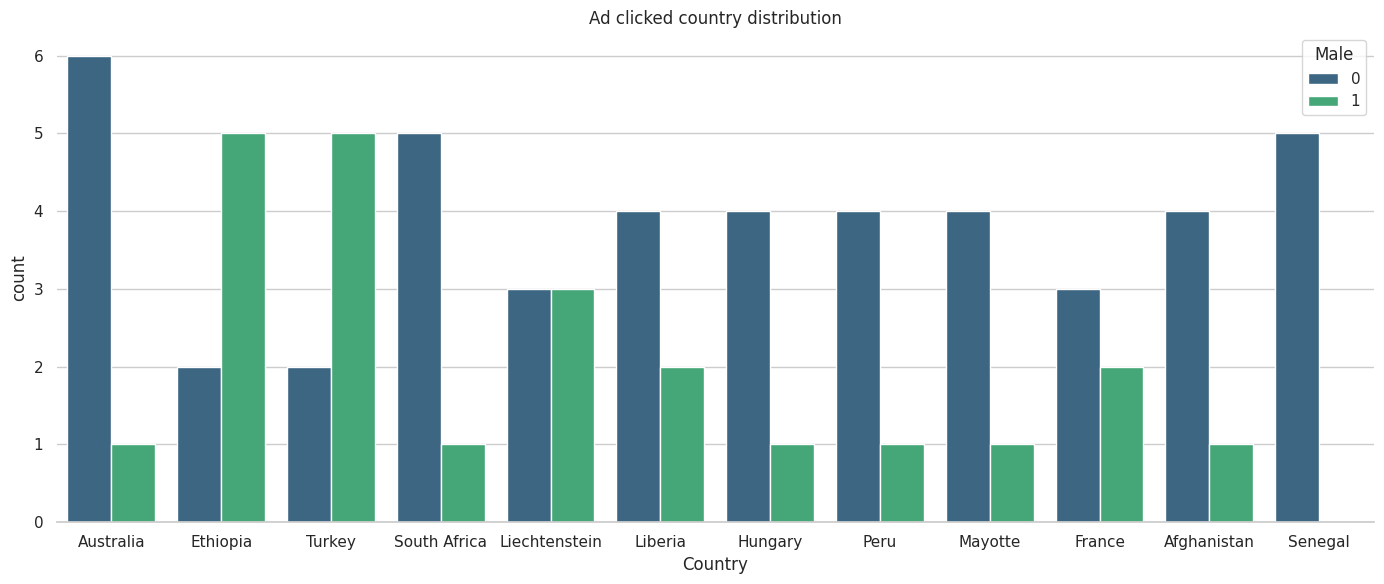

In [40]:
plt.figure(figsize=(14,6))
sns.countplot(x='Country',data=df[df['Clicked on Ad']==1],order=df[df['Clicked on Ad']==1]['Country'].value_counts().index[:12],hue='Male',
              palette='viridis')
plt.title('Ad clicked country distribution')
plt.tight_layout()
sns.despine(left=True)

#### Most are developing countries and females are the active contributors.

### Hourly distribution of ad clicks

In [41]:
hdf = pd.pivot_table(df, index = ['Hour'], columns = ['Male'], values = ['Clicked on Ad'],
                     aggfunc= np.sum).rename(columns = {'Clicked on Ad':'Clicked'})

#cm = sns.color_palette("BrBG_r", as_cmap=True)
cm = "BrBG_r"
hdf.style.background_gradient(cmap=cm)  # Sums all 1's i.e clicked for each hour

### Distribution by each hour and by gender.
Overall females tend to click on a Ad more often than males.

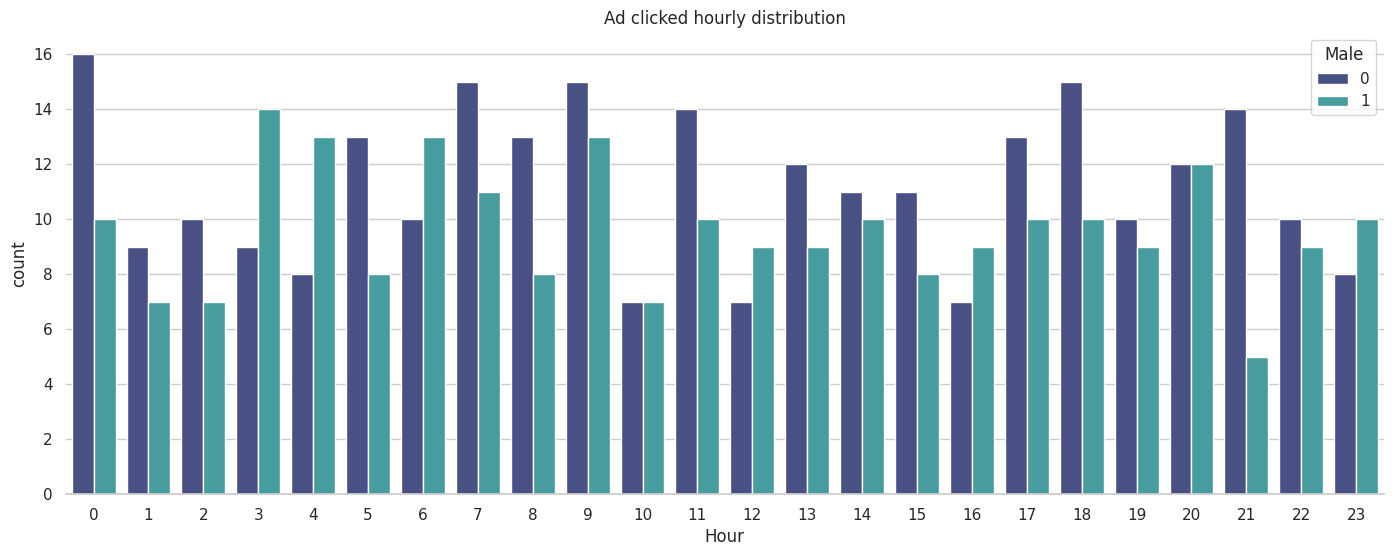

In [42]:
plt.figure(figsize=(17,6))
sns.countplot(x='Hour',data=df[df['Clicked on Ad']==1],hue='Male',palette='mako')
plt.title('Ad clicked hourly distribution')
sns.despine(left=True)

#### As we can see with uneven daytime frequency, females are the main contributor exceeding males several hours.


### Daily distribution of ad clicks

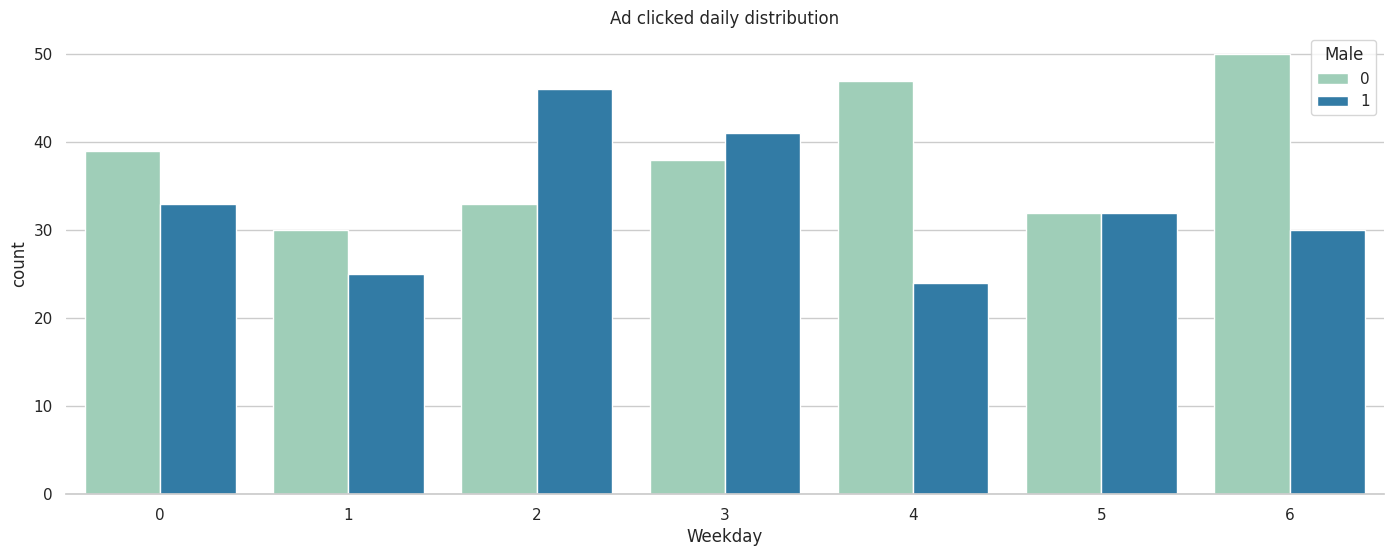

In [43]:
plt.figure(figsize=(17,6))
sns.countplot(x='Weekday',data=df[df['Clicked on Ad']==1],hue='Male',palette='YlGnBu')
plt.title('Ad clicked daily distribution')
sns.despine(left=True)

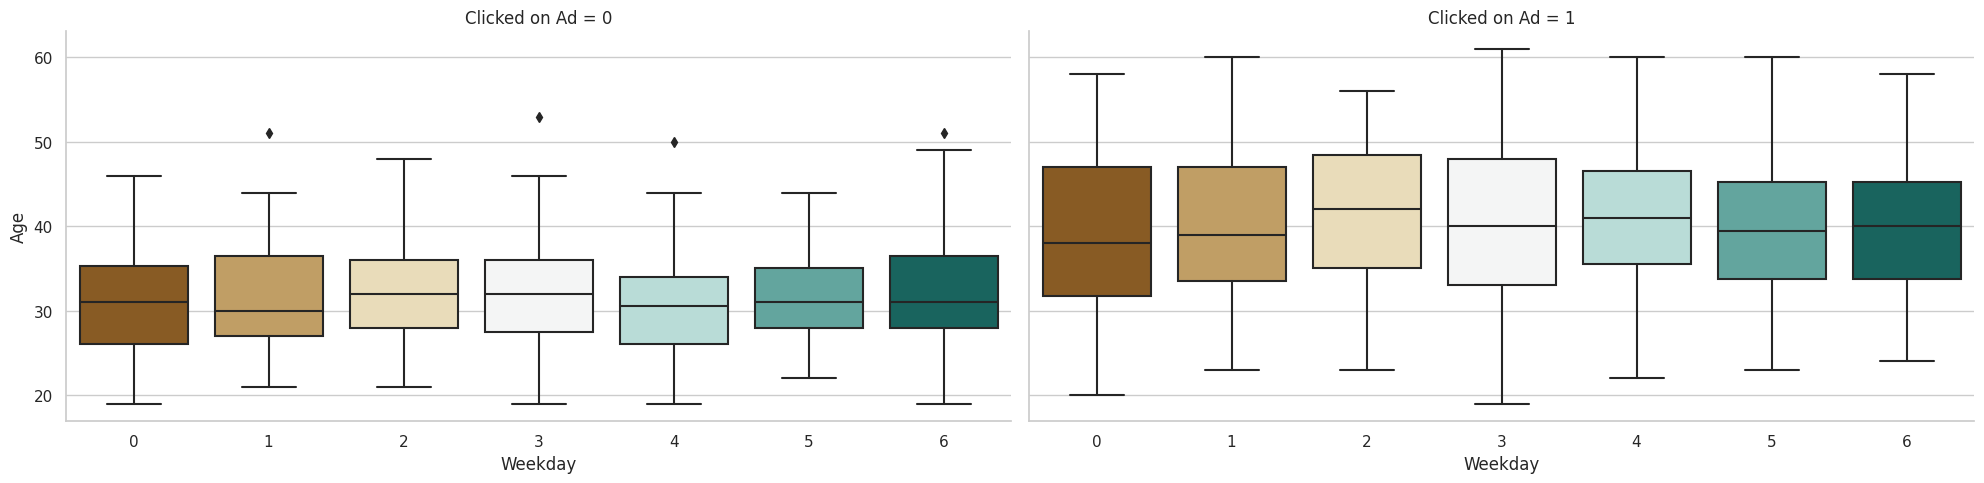

In [50]:
sns.catplot(x="Weekday", y="Age", col="Clicked on Ad", data=df, kind="box", height=5, aspect=2.0, palette='BrBG')

#### Comparison of users who have clicked on an ad or not in terms of age and weekday. People of higher age tend to click on an ad.

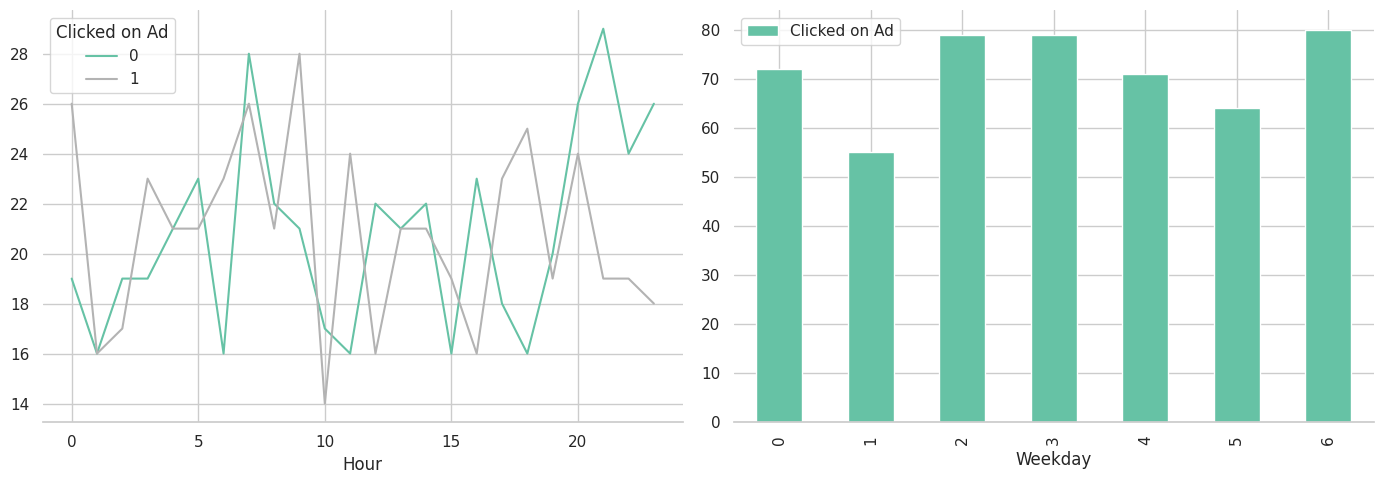

In [51]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["Clicked on Ad"], df["Hour"]).T.plot(style = [], ax = ax[0],cmap='Set2')
pd.pivot_table(df, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1],cmap='Set2') # 0 - Monday
plt.tight_layout()
sns.despine(left=True)
plt.show()

- The line chart here indicates that users tend to click on an Ad later in the day or probably early in the morning.

- It is expected based on the age feature that most people are working, so it seems appropriate as they either find time early or late in the day.
- Also, Sunday seems to be effective for clicking on an ad from the bar chart.

#### Most of the Days Ladies click ad more than Males except Wednesdays and Thursdays.

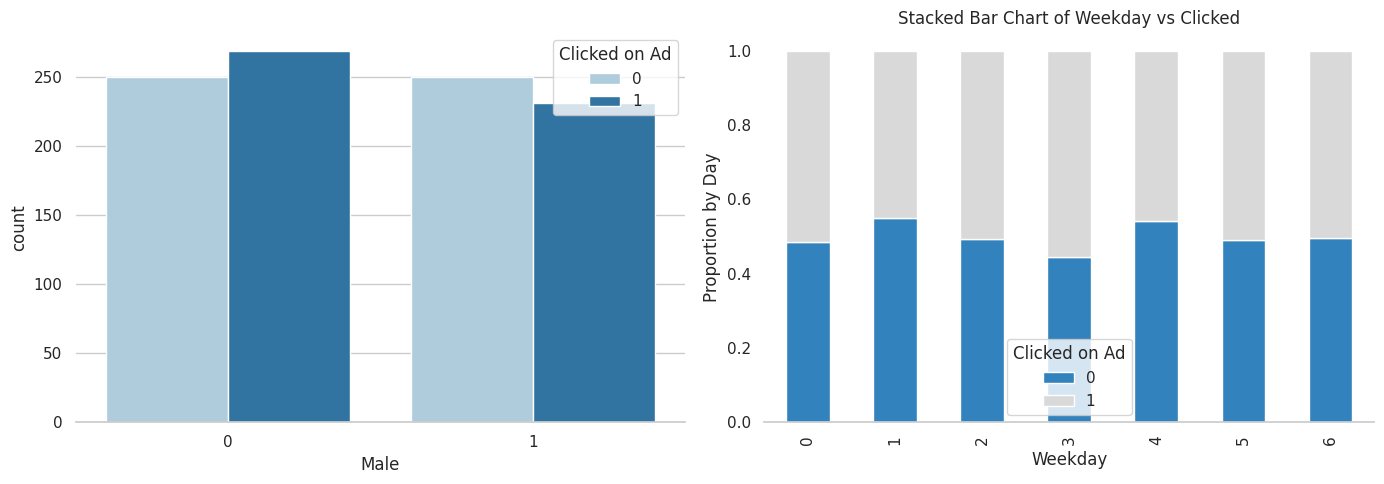

In [52]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.despine(left=True)
sns.countplot(x='Male',hue='Clicked on Ad',data=df,palette='Paired', ax = ax[0]) # Overall distribution of Males and females count
table = pd.crosstab(df['Weekday'],df['Clicked on Ad'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1], grid = False,cmap = "tab20c") # 0 - Monday
ax[1].set_title('Stacked Bar Chart of Weekday vs Clicked')
ax[1].set_ylabel('Proportion by Day')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

#### From the stacked bar chart, it seems that there are more chances of users clicking on an ad if it's a Thursday!

### Monthly distribution of ad clicks

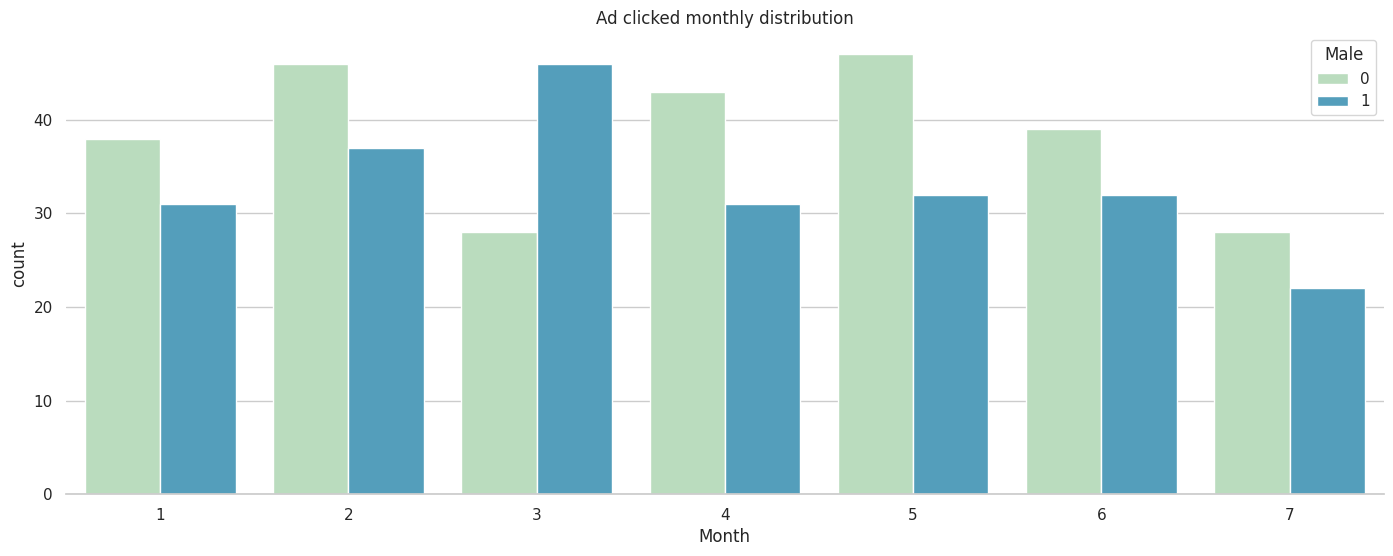

In [53]:
plt.figure(figsize=(17,6))
sns.countplot(x='Month',data=df[df['Clicked on Ad']==1],hue='Male',palette='GnBu')
plt.title('Ad clicked monthly distribution')
sns.despine(left=True)

#### Throughout the Year, Ladies click on Ads the most except the month of March.

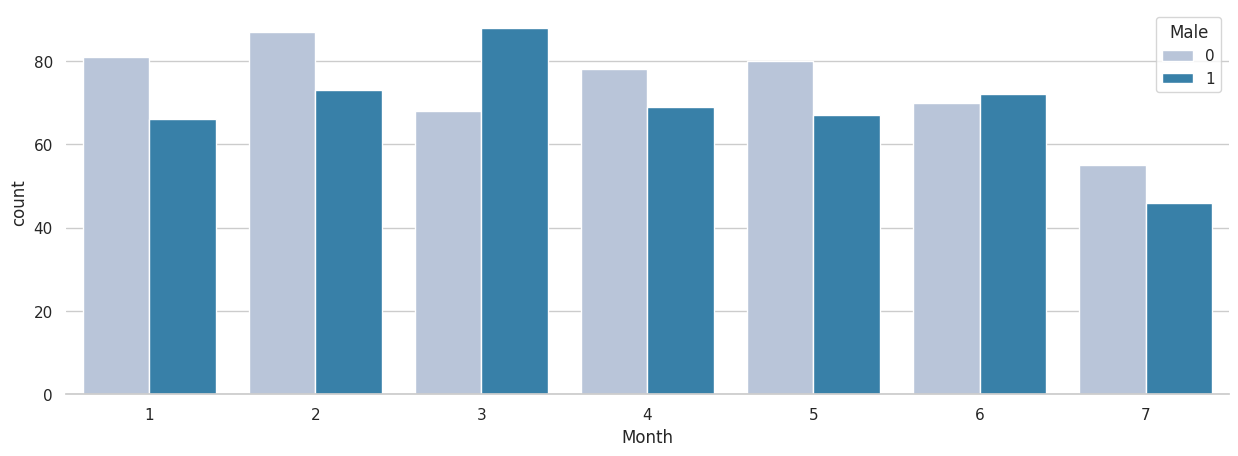

In [59]:
sns.set(style="whitegrid")
sns.countplot(x='Month', hue='Male', data=df, palette='PuBu')
sns.despine(left=True)
plt.gcf().set_size_inches(15, 5)

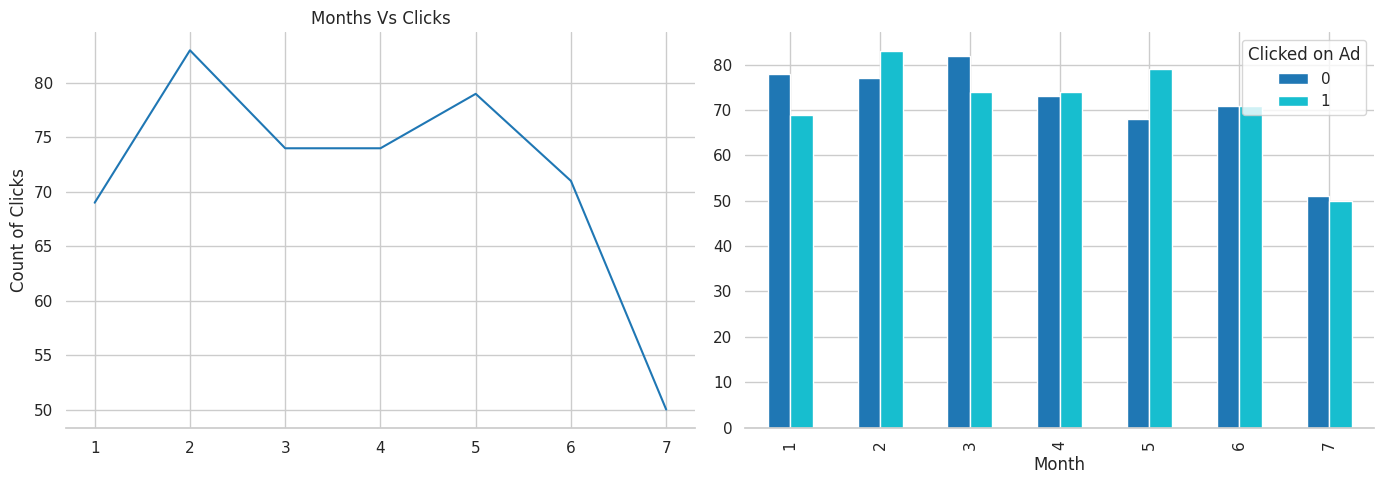

In [60]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['Month'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0],cmap = "tab10")
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["Clicked on Ad"], df["Month"]).T.plot(kind = 'bar',ax=ax[1],cmap = "tab10")
#df.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
sns.despine(left=True)
plt.show()

- Line chart showing the count of clicks for each month.
- Grouped bar chart shows the distribution of the target variable across seven months.
- ```2nd``` Month seems to be the best for clicking on an Ad.

### Now we shall group by date and see

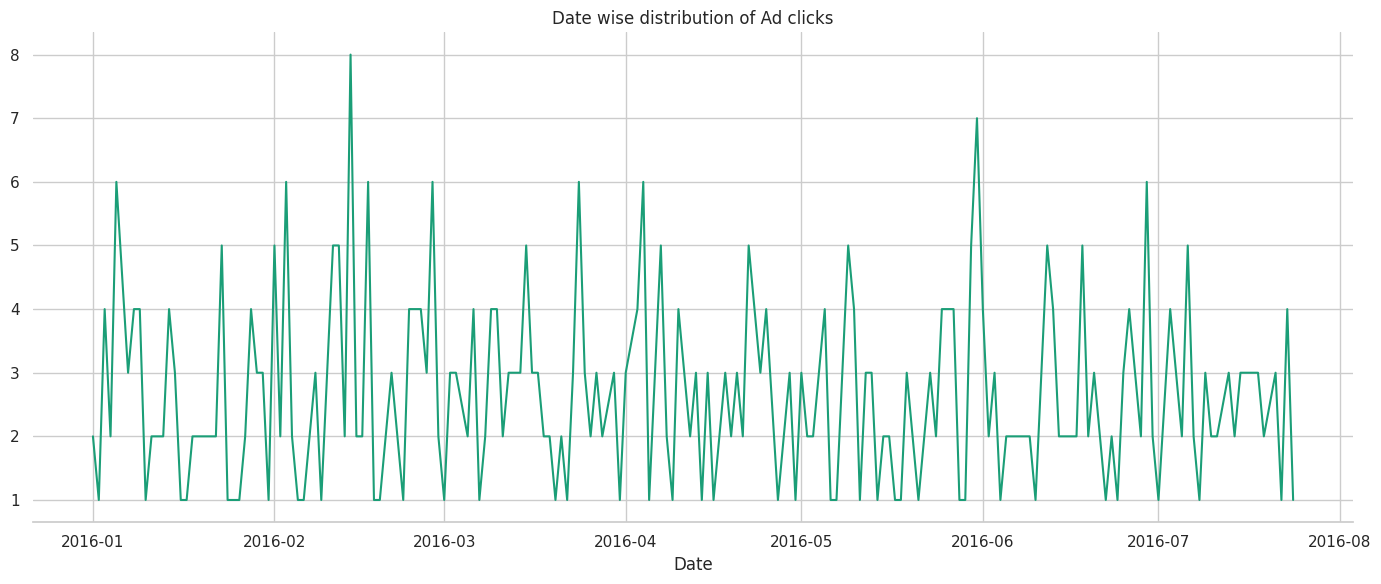

In [61]:
plt.figure(figsize=(14,6))
df[df['Clicked on Ad']==1].groupby('Date').count()['Clicked on Ad'].plot(cmap = "Dark2")
plt.title('Date wise distribution of Ad clicks')
sns.despine(left=True)
plt.tight_layout()

### Top Ad clicked on specific date

In [62]:
df[df['Clicked on Ad']==1]['Date'].value_counts().head(5)

2016-02-14    8
2016-05-31    7
2016-01-05    6
2016-02-17    6
2016-04-04    6
Name: Date, dtype: int64

#### On 14th February 2016, we saw most eight clicks on the ad. So Valentine Day is the best selling day for the Company's Ad.

### Lets see Daily internet usage and daily time spent on site based on age

In [69]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df['Daily Time Spent on Site'], cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(df['Age'], cmap="Reds", shade=True, shade_lowest=False)
ax.set_xlabel('Time')
ax.text(20, 20, "Daily Time Spent on Site", size=16, color='r')
ax.text(200, 60, "Daily Internet Usage", size=16, color='b')
sns.despine(left=True)

from IPython.display import display # To display the plot
display(fig)

ValueError: ignored

<Figure size 1200x600 with 1 Axes>

ValueError: ignored

<Figure size 1200x600 with 1 Axes>

- As we can see, people around **30** years the population devote a lot of their time to the internet and the site,but they don't click on Ads that frequent.

- Compared to them, around **40** years population spend a bit less time but click on Ads more.

In [70]:
df['Ad Topic Line'].nunique()

1000

#### All ad topics are different which makes it really difficult to feed for model.

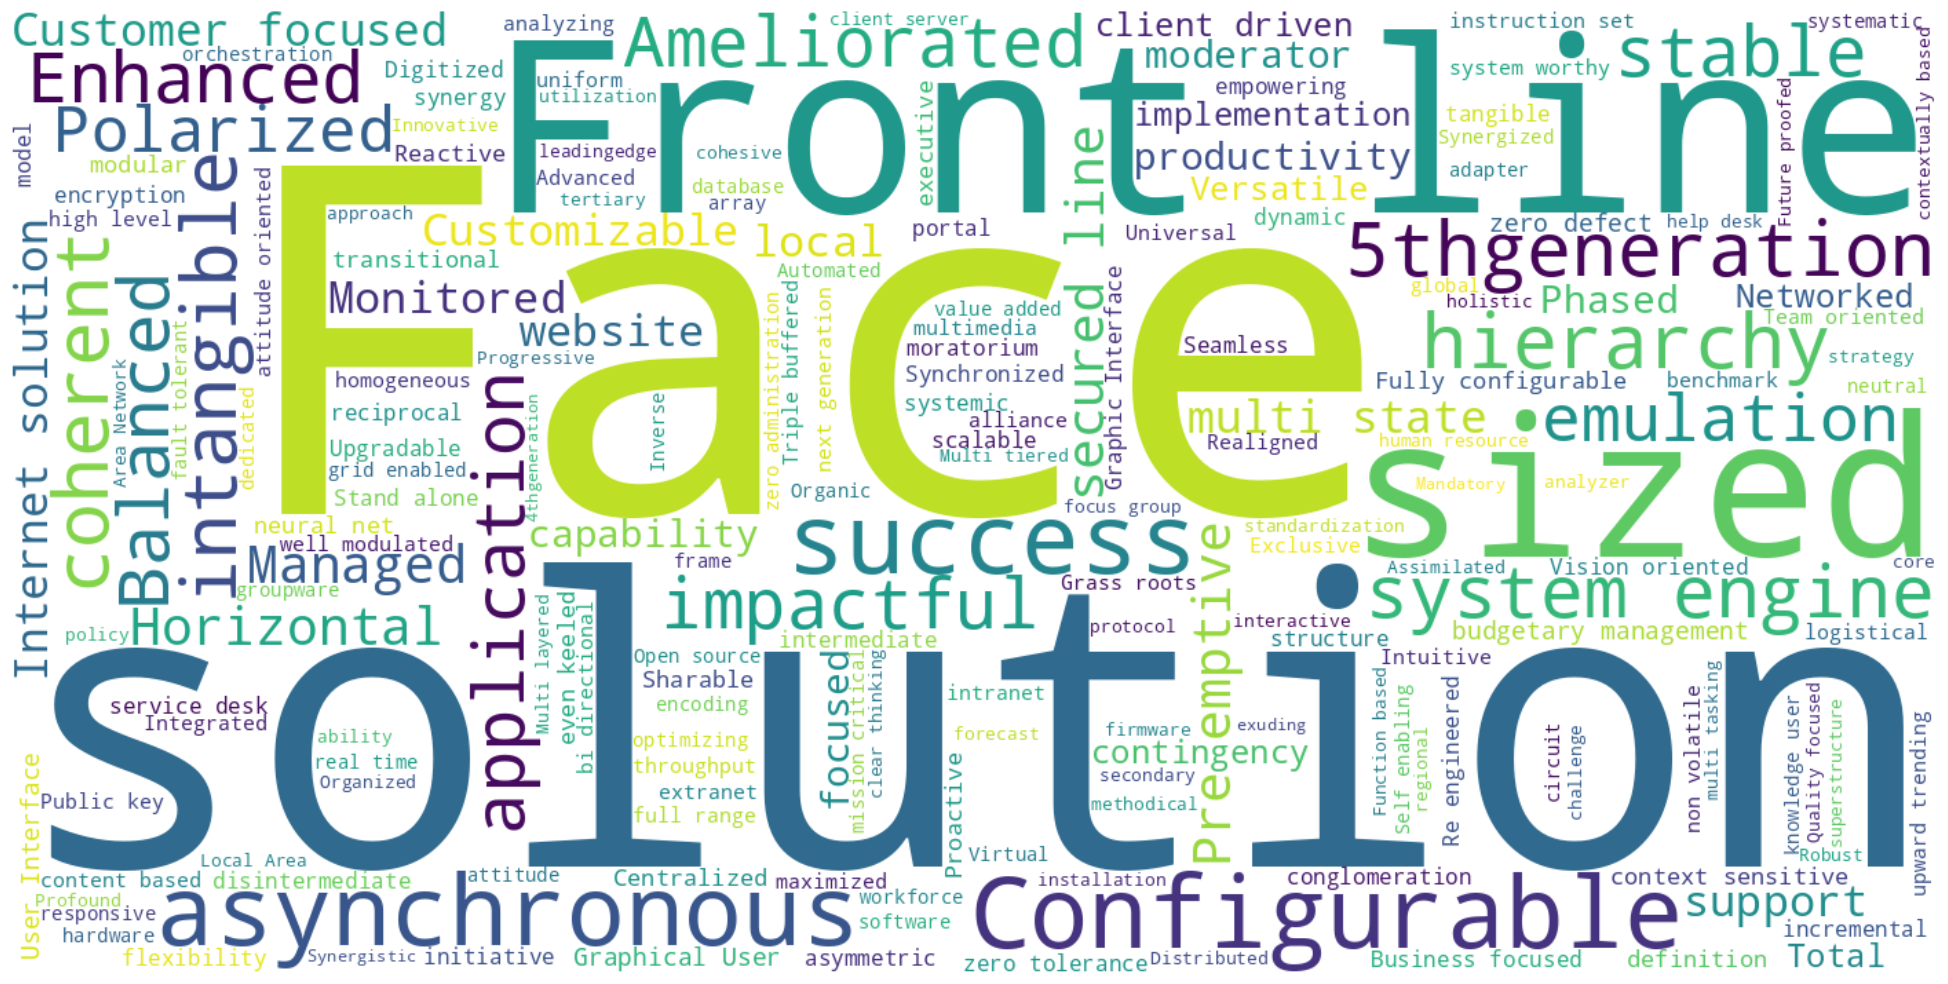

In [71]:
text = ' '.join(topic_line for topic_line in df['Ad Topic Line'])
world_cloud = WordCloud(width=1400, height=700,background_color='white').generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

#### Unfortunately, it looks like it will not be possible to feature engineer groups of phrases or words based on this word cloud.

### Distribution and Relationship Between Variables
Creating a pairplot with hue defined by Clicked on Ad column

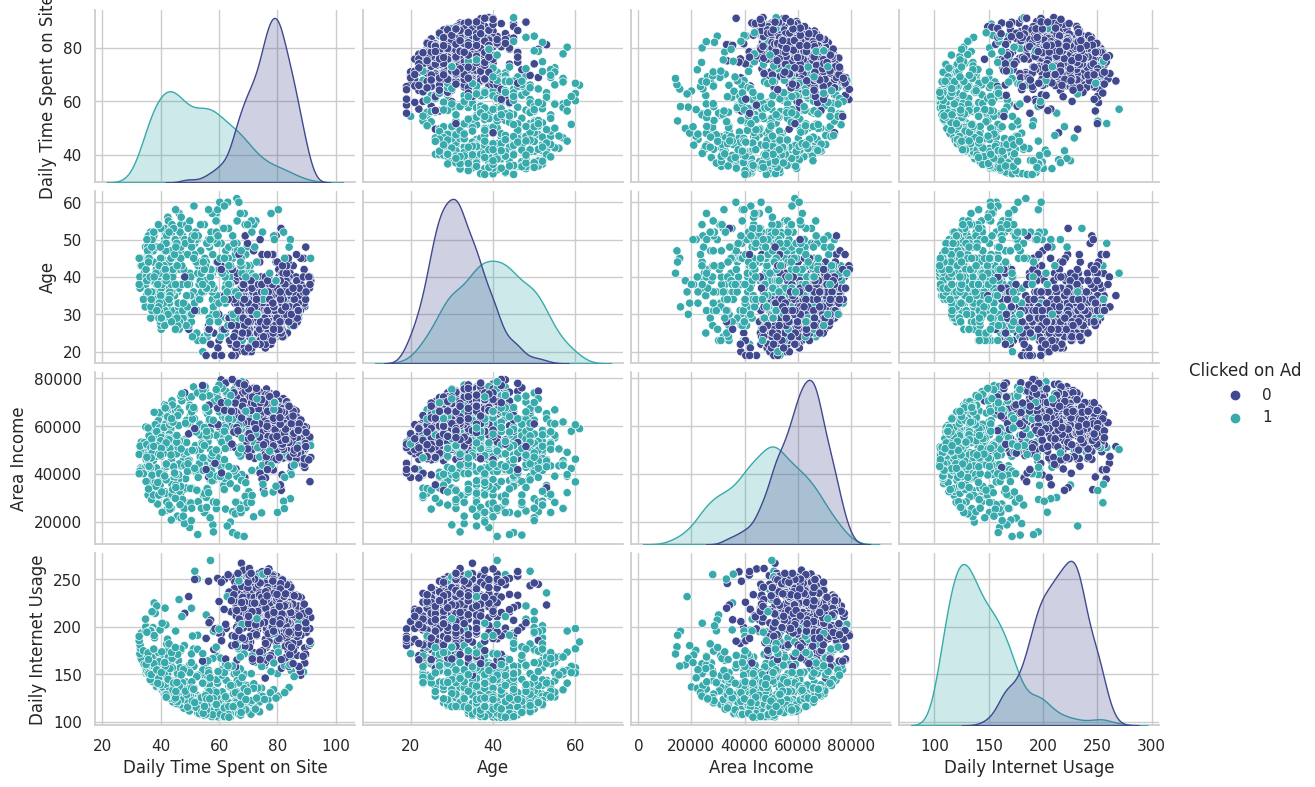

In [73]:
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'mako',height = 2,aspect=1.5)

- This plot shows us a tremendous amount of info!
- The most exciting part of this graph is the pronounced differences between people that clicked on adverts and people that didn't.
- Furthermore, all of the variables bear no correlation to each other!
- Each univariate distribution shows apparent differences in kurtosis and means between people who clicked on an ad and those who did not.
- All the pair plots also indicate clear clumping between the two groups.
- People that do not click on ads seem to follow more precise patterns.
- People that did not click on ads seem to be less tightly clumped.
- It would seem that larger kurtosis values could be attributed to people that did not click on an ad, backing up the previous statement.
- This would need to be backed up in quantitive analysis to be made sure of, however.

T-tests would be a good way around testing this.

#### Let's plot a two-dimensional density plot to determine the interdependence of two variables.
Let's see how the user's ```age``` and the ```time-spent``` on the site are linked.

In [75]:
sns.jointplot(df["Area Income"], df["Age"], color='#38A3A5')
plt.show()

TypeError: ignored

In [ ]:
sns.jointplot(df["Daily Time Spent on Site"], df.Age, kind='kde',color='#57CC99')

- From the picture, we can conclude that younger users spend more time on the site.
- This implies that users between 20 and 40 years can be the leading target group for the marketing campaign.
- Hypothetically, if we have a product intended for middle-aged people, this is the right site for advertising.
- Conversely, if we have a product designed for people over 60, it would be a mistake to advertise on this site.


- We will present another density graphic and determine the interdependency of ```'Daily Time Spent on Site'``` and ```'Daily Internet Usage'```.
- Let's plot a two-dimensional density plot to assess the interdependence of two variables.
- Let's see how the user's **age** and the **time-spent** on the site are linked.

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(df["Daily Time Spent on Site"], df['Daily Internet Usage'],
    cmap=cmap, n_levels=100, shade=True);
sns.despine(left=True)

#### From the figure above, it is clear that users who spend more time on the internet also spend more time on the site.


In [ ]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (17, 4))
    plt.subplot(1,2,1)
    sns.boxplot(df[i],color="#ADEFD1FF")
    plt.subplot(1,2,2)
    sns.distplot(df[i],bins= 20,color="#00203FFF")
    plt.title(i)
    sns.despine(left=True)
    plt.show()

- We can see that daily internet usage and daily time spent on a site has two peaks (Bi-model in statistical terms).
- It indicates that there are two different groups present in our data.
- We don't expect the users to be generally distributed as people spend more time on the internet/website and people who spend less time.
- Some regularly use the website and some less often, so they are perfectly all right.

### Lets see Age distribution

In [ ]:
from scipy.stats import norm
sns.distplot(df['Age'], hist=False, color='#80ED99', rug=True, fit=norm);
sns.despine(left=True)

#### It can be concluded that the variable 'Age' has a normal distribution of data.

In [ ]:
print('oldest person was of:', df['Age'].max(), 'Years')
print('Youngest person was of:', df['Age'].min(), 'Years')
print('Average age was of:', df['Age'].mean(), 'Years')

### Clicked Vs Not Clicked

In [ ]:
df.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income',
                            'Daily Internet Usage'].mean()

#### Average profile of a user who will click on a ad or not.

In [ ]:
df.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

In [ ]:
count=pd.DataFrame(df['Male'].value_counts())
count=count.rename_axis(['Sex']).reset_index()
count=count.rename(columns={'Male':'Count'})
count
px.bar(count, x='Sex', y='Count', color='Sex',template="none")

#### Distribution of clicks by gender. It seems that more number of females have clicked on ad.

### Visualizing target variable Clicked on Ad

In [ ]:
plt.figure(figsize = (17, 6))
plt.subplot(1,2,1)
sns.countplot(x = 'Clicked on Ad', data = df,palette = 'GnBu')
plt.subplot(1,2,2)
sns.distplot(df["Clicked on Ad"], bins = 20,color="#078282FF")
sns.despine(left=True)
plt.show()

- The graph above demonstrates that the data is roughly **50/50** if the user clicks on the ad.

- So from the plot, we can see that the number of users who click on an ad and who do not are equal in numbers, i.e. **500**, which makes it very interesting.

### Lets see Click on Ad features based on Sex

In [ ]:
plt.figure(figsize=(18,7))
sns.countplot(x='Clicked on Ad',data=df,hue='Male',palette='tab10')
sns.despine(left=True)

#### Female tends to click more on Ads!

In [ ]:
px.box(df,y='Daily Time Spent on Site',color='Clicked on Ad',template="none")

In [ ]:
px.box(df,y='Age',color='Clicked on Ad',template="none")

In [ ]:
px.box(df,y='Area Income',color='Clicked on Ad',template="none")

In [ ]:
px.box(df,y='Daily Internet Usage', color='Clicked on Ad',template="none")

In [ ]:
for col in numeric_cols :
    plt.figure(figsize=(17,5))

    plt.subplot(1,2,1)
    sns.distplot(df[col],color = '#085F63')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.subplot(1,2,2)
    sns.boxplot(x='Clicked on Ad', y = col, data =df, showmeans = True,palette = 'Set3')
    plt.xlabel('Target')
    plt.ylabel(col)
    sns.despine(left=True)
    plt.show()

In [ ]:
f,ax=plt.subplots(2,2, figsize=(18,14))
sns.violinplot("Male","Age", hue= "Clicked on Ad", data=df,ax=ax[0,0],palette="spring")
ax[0,0].set_title('Gender and Age vs Clicked on Ad or not')
ax[0,0].set_yticks(range(0,80,10))
sns.violinplot("Weekday","Age", hue="Clicked on Ad", data=df,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Weekday and Age vs Clicked on Ad or not')
ax[0,1].set_yticks(range(0,90,10))
sns.violinplot("Male","Daily Time Spent on Site", hue="Clicked on Ad", data=df,ax=ax[1,0],palette="autumn")
ax[1,0].set_title('Gender and Daily time spent vs (Clicked on ad or not)')
#ax[1,0].set_yticks(range(0,120,10))
sns.violinplot("Weekday","Daily Time Spent on Site", hue="Clicked on Ad", data=df,ax=ax[1,1],palette="winter")
ax[1,1].set_title('Weekday and Daily time spent vs (Clicked on ad or not)')
#ax[1,1].set_yticks(range(0,120,10))
sns.despine(left=True)
plt.show()

### Let's see the distribution of who clicked on Ads based on area income of sex.

In [ ]:
plt.figure(figsize=(17,6))
sns.violinplot(x=df['Male'],y=df['Area Income'],data=df,palette='viridis',hue='Clicked on Ad')
plt.title('Clicked on Ad distribution based on area distribution')
sns.despine(left=True)

- Both Males and Females with Area income less than **50k** are the main customers of Ad.
- Like almost all whose income more than **60k** are not interested in clicking on Ad

#### Thus, in conclusion, mostly around 40 years Females within income group less than 50k in developing countries are the primary consumers of Ad, clicking unevenly throughout the day and mainly during Fridays and Sundays.

### Lets see Age distribution

In [ ]:
plt.figure(figsize=(17,6))
sns.swarmplot(x=df['Clicked on Ad'],y= df['Age'],data=df,palette='viridis')
plt.title('Age wise distribution of Ad clicks')
sns.despine(left=True)

#### As it's clear from above, around 40 years population are the most contributor to ad clickings and not approximately 30 years.

In [ ]:
px.scatter(df,y='Daily Time Spent on Site',x='Age', color='Clicked on Ad',template="none")

In [ ]:
px.scatter(df,y='Area Income',x='Age', color='Clicked on Ad',template="none")

In [ ]:
px.scatter(df,y='Daily Internet Usage',x='Age', color='Clicked on Ad',template="none",)

In [ ]:
px.scatter(df,y='Daily Internet Usage',x='Daily Time Spent on Site', color='Clicked on Ad',template="none")

In [ ]:
px.scatter(df,y='Daily Internet Usage',x='Area Income', color='Clicked on Ad',template="none")

### Correlation Between Variables

In [ ]:
fig = plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), cmap='Accent_r', annot = True) # Degree of relationship i.e correlation using heatmap

- Heatmap gives us a better understanding of the relationship between each feature.
- Correlation is measured between -1 and 1. The higher the absolute value, the higher is the degree of correlation between the variables.
- We expect **daily internet usage** and **daily time spent on-site** to correlate more with our target variable.
- None of our explanatory variables seems to correlate with each other, indicating no collinearity in our data.

## Outliers
### Identifying Potential Outliers using IQR
- Here we shall use an IQR method.
- For any quantitive variables, points greater than 1.5IQR above or below the upper and lower quartiles are assumed outliers.

In [ ]:
exten_qual_cols = [
    'Daily Time Spent on Site', 'Age',
    'Area Income', 'Daily Internet Usage'
]

outliers_df = pd.DataFrame(columns=df.columns)

for col in exten_qual_cols:
    stat = df[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR

    outliers = df[(df[col] > upper) | (df[col] < lower)]

    if not outliers.empty:
        print(f'\nOutlier found in: {col}')
        outliers_df = pd.concat([outliers_df, outliers])
    else:
        print(f'\nNo outlier found in: {col}')

    print(f'\nSuspected Outliers Lower Bound: {lower}')
    print(f'Suspected Outliers Upper Bound: {upper}\n\n')

print(f'Number of outlier rows: {len(outliers_df)}')

del outliers

In [ ]:
outliers_df.head(10)

- This shows that nine people could be classed as being an outlier.
- These all belong in the Area Income variable. Because of this, we would not order these as outliers as they could come from low-income areas.

- Furthermore, unless the data source the area incomes incorrectly or there is a misunderstanding in how that variable was collected/created, there is no need to remove these.

## T-Test & F-Test Between Groups of People that Clicked on Ads

- Before applying a t-test, it is a good idea to check if our data is usually distributed.
- We also need to figure out if there is a difference invariance, then we need to think carefully about whether testing for a difference in the mean values is helpful.

### Variance

In [ ]:
analysis_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

for col in analysis_cols:
    vars_ = []

    for clicked in [0, 1]:
        var = np.var(
            df[df['Clicked on Ad'] == clicked][col],
            ddof=1
        )
        vars_.append(var)

        if clicked:
            print(f'Sample variance for {col} of clicked: {var}')
        else:
            print(f'Sample variance for {col} of non clicked: {var}')


    print(f'Differences in Variance: {round(abs(vars_[0] - vars_[1]), 2)}\n')

These differences in variance are HUGELY different. There is really no need for an F-Test here. We can quite confidently say that the variances between the two groups of people are diffent. This would explain the scale difference of the two distrubtions.

Next let us test if the means are different.

### Mean

In [ ]:
for col in analysis_cols:
    means_ = []

    for clicked in [0, 1]:
        mean = np.mean(
            df[df['Clicked on Ad'] == clicked][col]
        )
        means_.append(mean)

        if clicked:
            print(f'Mean for {col} of clicked: {mean}')
        else:
            print(f'Mean for {col} of non clicked: {mean}')


    print(f'Differences in Mean: {round(abs(means_[0] - means_[1]), 2)}\n')

- We can see that the daily time spent on the site and everyday internet usage have apparent differences in mean.
- Age and area income is not as clear, however. T-tests are needed to determine if these groups are different here.
- First, we need to test if these variables are normally distributed.
- Before applying a t-test, it is a good idea to check if our data is usually spread.
- We also need to figure out if there is a difference invariance, then we need to think carefully about whether testing for a difference in the mean values is helpful.

## Testing for Normality

Null Hypothesis ( H0 ):

The data is normally distributed.

Alternative Hypothesis ( H1 ):

The data is not normally distributed.

Significance Level:

α=0.05

In [ ]:
from scipy import stats

alpha = 0.05

for col in analysis_cols:

    for clicked in [0, 1]:
        k2, p = stats.normaltest(df[df['Clicked on Ad'] == clicked][col])

        if clicked:
            print(f'Results for clicked {col}:')
        else:
            print(f'Results for nonclicked {col}:')

        print(f'\tStatistic: {k2}')
        print(f'\tpvalue: {p}')

        if p < alpha:
            print('The null hypothesis can be rejected.\n')
        else:
            print('The null hypothesis cannot be rejected.\n')

- Strangely, none of the distributions is normal!
- The distribution of daily internet usage of the people who clicked on the ad is astronomically far from being a normal distribution!
- Because none of the distributions can be assumed to be expected, a non-parametric test would be more robust here.
- As both samples can be taken not to be normally distributed and both can be considered independent, a Mann-Whitney test is most appropriate here.

## Mann-Whitney U Test

Null Hypothesis ( H0 ):

Data of people clicking on ads is distributed the same as people not clicking on ads.

Alternative Hypothesis ( H1 ):

Data of people clicking on ads is distributed the not the same as people not clicking on ads.

Significance Level:

α=0.05

In [ ]:
alpha = 0.05

for col in analysis_cols:
        clicked = df[df['Clicked on Ad'] == 1][col]
        non_clicked = df[df['Clicked on Ad'] == 0][col]

        w, p = stats.mannwhitneyu(x=clicked, y=non_clicked, alternative='two-sided')

        print(f'Results for {col}: ')
        print(f'\tStatistic: {w}')
        print(f'\tpvalue: {p}')

        if p < alpha:
            print('The null hypothesis can be rejected.\n')
        else:
            print('The null hypothesis cannot be rejected.\n')